U_FLCSTT = 1, U_HWPANG = 0.0:
Median Normalized Flux: -0.12103930449123004
Mean Normalized Flux: -0.11854046034439603
Standard Deviation of Normalized Flux: 0.006707951035510958



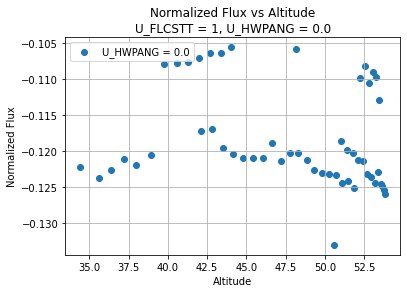

U_FLCSTT = 1, U_HWPANG = 45.0:
Median Normalized Flux: -0.11526454650390607
Mean Normalized Flux: -0.11573285329099023
Standard Deviation of Normalized Flux: 0.009286505203811567



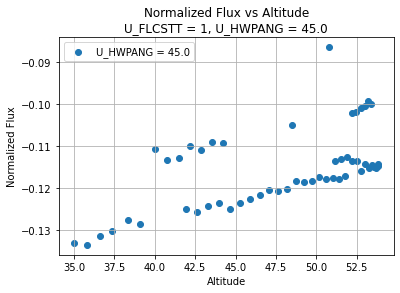

U_FLCSTT = 1, U_HWPANG = 22.5:
Median Normalized Flux: -0.10887450432708655
Mean Normalized Flux: -0.10748797252086446
Standard Deviation of Normalized Flux: 0.006985297459808246



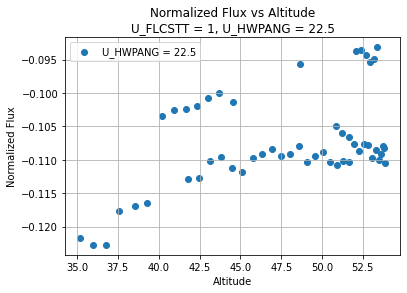

U_FLCSTT = 1, U_HWPANG = 67.5:
Median Normalized Flux: -0.13326845905684861
Mean Normalized Flux: -0.13032544227748902
Standard Deviation of Normalized Flux: 0.0066677011505738406



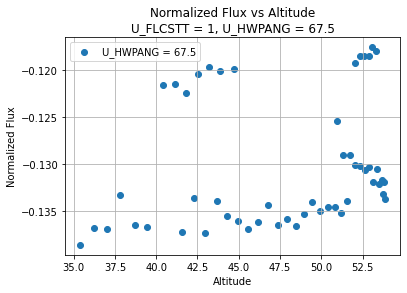

U_FLCSTT = 2, U_HWPANG = 0.0:
Median Normalized Flux: -0.1335547133558668
Mean Normalized Flux: -0.13499922486966184
Standard Deviation of Normalized Flux: 0.008538203201654332



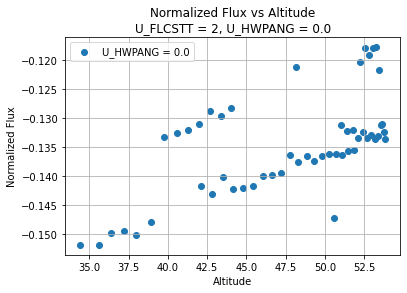

U_FLCSTT = 2, U_HWPANG = 45.0:
Median Normalized Flux: -0.13297947195709486
Mean Normalized Flux: -0.1310684791095994
Standard Deviation of Normalized Flux: 0.008197801648114846



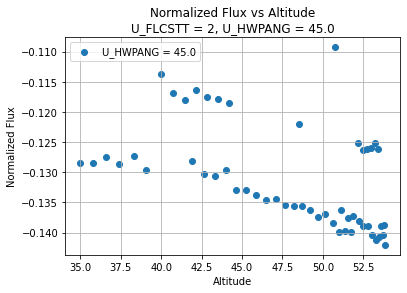

U_FLCSTT = 2, U_HWPANG = 22.5:
Median Normalized Flux: -0.1517493580082983
Mean Normalized Flux: -0.1490899861341432
Standard Deviation of Normalized Flux: 0.005925846034656287



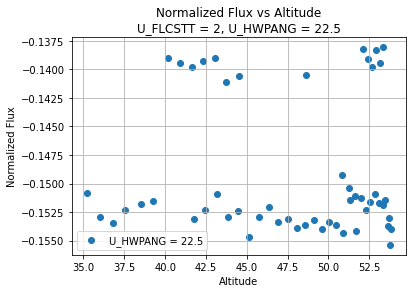

U_FLCSTT = 2, U_HWPANG = 67.5:
Median Normalized Flux: -0.12132628735690332
Mean Normalized Flux: -0.11879824330321953
Standard Deviation of Normalized Flux: 0.0064028150405207596



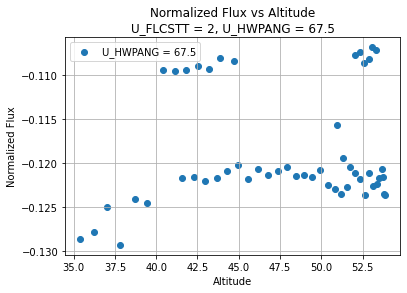

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the .csv file
csv_file = "/home/shared/exoserver/VAMPIRES/20220127/eta_crv/rz_dpp/collapsed/20240111_Eta_Crv_675_nm_Header_Parameters_R_15_Aperture_with_errors.csv"
df = pd.read_csv(csv_file)

# Function to process and plot data based on U_FLCSTT and U_HWPANG values
def plot_and_stats_normalized_flux(df, flcstt_value, hwpang_value):
    # Filter the data for the given U_FLCSTT and U_HWPANG values
    df_filtered = df[(df['U_FLCSTT'] == flcstt_value) & (df['U_HWPANG'] == hwpang_value)]

    # Further filter data for U_CAMERA values 1 and 2
    counts_camera_1 = df_filtered[df_filtered['U_CAMERA'] == 1]['R_15_TOTAL_COUNTS'].values
    counts_camera_2 = df_filtered[df_filtered['U_CAMERA'] == 2]['R_15_TOTAL_COUNTS'].values

    # Ensure both arrays are of the same length
    min_length = min(len(counts_camera_1), len(counts_camera_2))
    counts_camera_1 = counts_camera_1[:min_length]
    counts_camera_2 = counts_camera_2[:min_length]

    # Calculate normalized flux
    normalized_flux = (counts_camera_1 - counts_camera_2) / (counts_camera_1 + counts_camera_2)

    # Use every other element of the ALTITUDE column
    altitudes = df_filtered['ALTITUDE'].values[::2]
    normalized_flux = normalized_flux[:len(altitudes)]  # Match lengths

    # Print median, mean, and standard deviation of normalized flux
    median_flux = np.median(normalized_flux)
    mean_flux = np.mean(normalized_flux)
    std_flux = np.std(normalized_flux)

    print(f"U_FLCSTT = {flcstt_value}, U_HWPANG = {hwpang_value}:")
    print(f"Median Normalized Flux: {median_flux}")
    print(f"Mean Normalized Flux: {mean_flux}")
    print(f"Standard Deviation of Normalized Flux: {std_flux}")
    print()

    # Plot normalized flux over altitudes
    plt.scatter(altitudes, normalized_flux, marker='o', label=f'U_HWPANG = {hwpang_value}')
    plt.xlabel('Altitude')
    plt.ylabel('Normalized Flux')
    plt.title(f'Normalized Flux vs Altitude\nU_FLCSTT = {flcstt_value}, U_HWPANG = {hwpang_value}')
    plt.grid(True)
    plt.legend()
    plt.show()

# Define the distinct values for U_FLCSTT and U_HWPANG
flcstt_values = [1, 2]
hwpang_values = df['U_HWPANG'].unique()

# Generate plots and statistics for each combination of U_FLCSTT and U_HWPANG
for flcstt_value in flcstt_values:
    for hwpang_value in hwpang_values:
        plot_and_stats_normalized_flux(df, flcstt_value, hwpang_value)
